In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
url = "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
download.file(url, "playerstats.csv")
player_Stat_Data <- read_csv("playerstats.csv")
head(player_Stat_Data)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


First we load in the data set as a .csv file and put it into a variable called "player_Stat_Data".

In [4]:
filtered_data <- select(player_Stat_Data,"Age","Prize Money","Best Rank") |> 
                    filter(!is.na(`Prize Money`)) |>
                    mutate(Age_number_only = as.numeric(gsub("\\s*\\(.*\\)", "", Age)),
                            Best_rank_number_only = as.numeric(gsub("\\s*\\(.*\\)", "",`Best Rank`)),
                            Prize_Money_number_only = as.numeric(gsub("\\$|,", "", str_extract(`Prize Money`, "\\$\\s*[0-9,]+"))))
head(filtered_data)

Age,Prize Money,Best Rank,Age_number_only,Best_rank_number_only,Prize_Money_number_only
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
18 (22-12-2001),"$59,040",316 (14-10-2019),18,316,59040
32 (03-11-1987),"US$3,261,567",44 (14-01-2013),32,44,3261567
21 (29-05-1998),"$374,093",130 (10-04-2017),21,130,374093
27 (21-10-1992),"US$6,091,971",17 (11-01-2016),27,17,6091971
22 (11-02-1997),"$1,517,157",31 (20-01-2020),22,31,1517157
28 (18-11-1991),"$278,709",213 (31-10-2016),28,213,278709


Here we first filtered out the NA value within the Prize Money column, then we mutate three new column named "Age_number_only", "Best_rank_number_only" and "Prize_Money_number_only" which in the column they only contains the numeric value of the variable. Then put the result into variable named "filtered_data". 

In [5]:
set.seed(200)

filtered_2nd_data <- select(filtered_data,"Prize_Money_number_only","Age_number_only","Best_rank_number_only")

playerState_split <- initial_split(filtered_2nd_data, prop = 0.75, strata = Best_rank_number_only)
playerState_train <- training(playerState_split)
head(playerState_train)

Prize_Money_number_only,Age_number_only,Best_rank_number_only
<dbl>,<dbl>,<dbl>
6091971,27,17
1517157,22,31
1893476,19,17
10507693,23,4
25889586,31,3
2722314,22,25


Then we select only numeric-value-columns from "filtered_data", and put them into "filtered_2nd_data", then we split and create our trainig set of data named "playerState_split". 

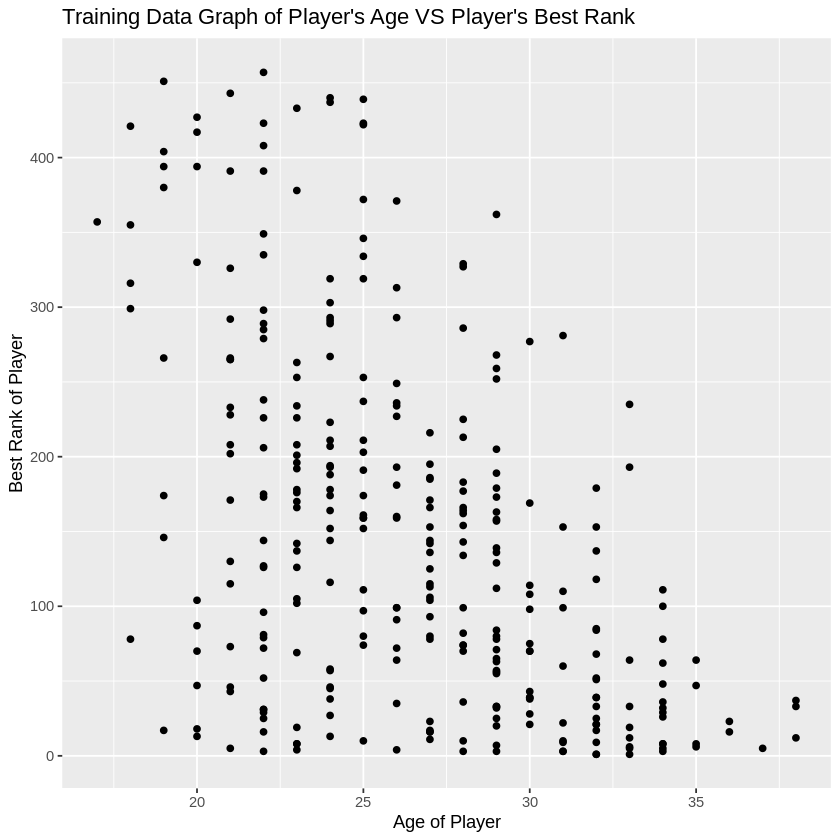

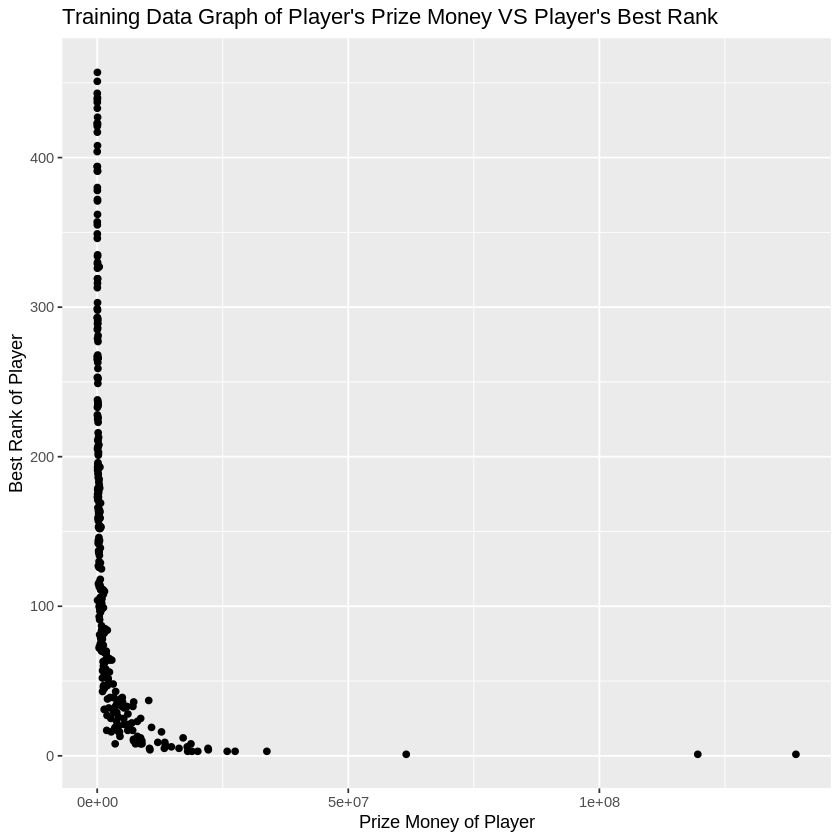

In [7]:
playerStat_plot_scatere_AvBR <- ggplot(playerState_train, aes(x = Age_number_only, y = Best_rank_number_only)) + 
                                    geom_point() +
                                    labs(x= "Age of Player", y = "Best Rank of Player") + 
                                    ggtitle("Training Data Graph of Player's Age VS Player's Best Rank")


playerStat_plot_scatere_AvPM <- ggplot(playerState_train, aes(x = Prize_Money_number_only, y = Best_rank_number_only)) + 
                                    geom_point() +
                                    labs(x= "Prize Money of Player", y = "Best Rank of Player") + 
                                    ggtitle("Training Data Graph of Player's Prize Money VS Player's Best Rank")

playerStat_plot_scatere_AvBR
playerStat_plot_scatere_AvPM